In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings('ignore')

#Importing the data and making a backup copy incase I need to view the original
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

train_original = train.copy()
test_original = test.copy()

In [3]:
#Looking at how the data is laid out
print(train.describe())
print(train.columns)

                 ID         Count
count  18288.000000  18288.000000
mean    9143.500000    138.958115
std     5279.435197    153.467461
min        0.000000      2.000000
25%     4571.750000     22.000000
50%     9143.500000     84.000000
75%    13715.250000    210.000000
max    18287.000000   1244.000000
Index(['ID', 'Datetime', 'Count'], dtype='object')


In [4]:
#Converting time and date to datetime format. 
train['Datetime'] = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')
train_original = pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')
test_original = pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')

In [5]:
#Manipulating data to see if hypothesis of peak hours is correct (peak hours would mean more riders)
for i in (train, test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [6]:
#Assigning a weekend variable
train['Day of Week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

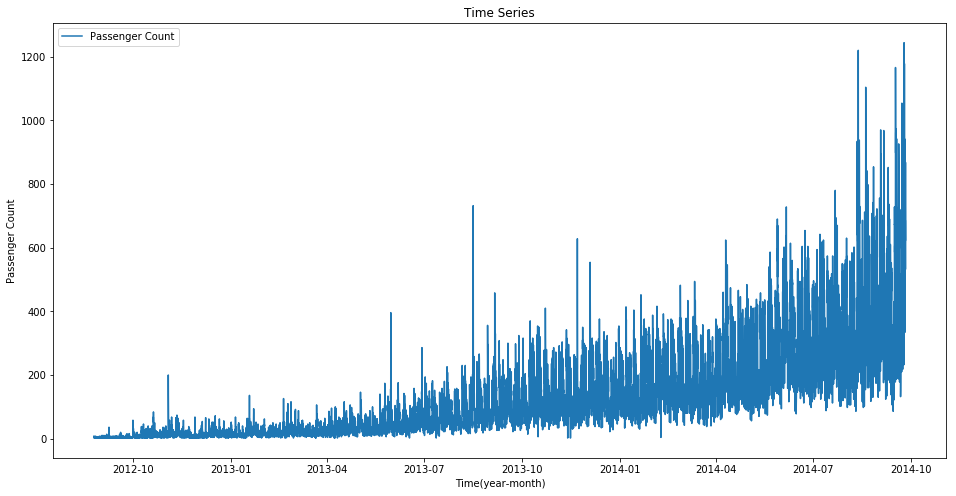

In [7]:
#Looking at Time Series
train.index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label = 'Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc='best')

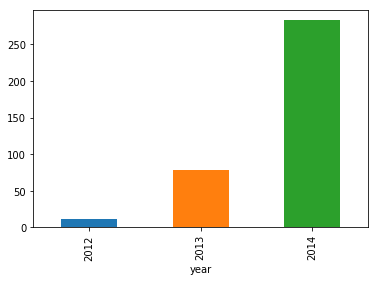

In [8]:
#Hypothesis that traffic will increase as years pass

train.groupby('year')['Count'].mean().plot.bar()

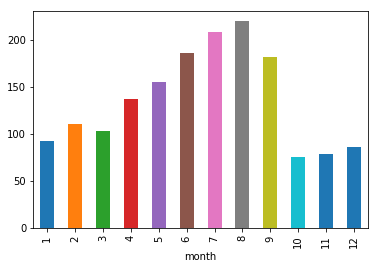

In [15]:
#Testing hypothesis that ridership increased from May to November
train.groupby('month')['Count'].mean().plot.bar()

<bound method IndexOpsMixin.value_counts of year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64>


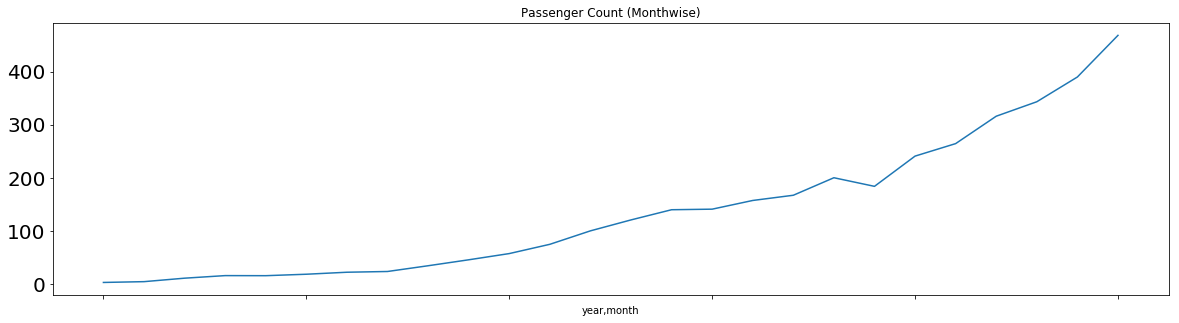

In [19]:
#The last three months don't look right because of the massive dropoff. 
#Examning the data for missing values or any signs of this
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(20,5), title='Passenger Count (Monthwise)', fontsize = 20)
print(temp.value_counts)

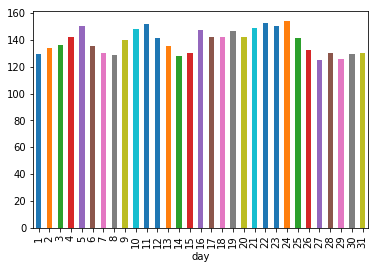

In [20]:
#Looking at the daily mean passenger count
train.groupby('day')['Count'].mean().plot.bar()

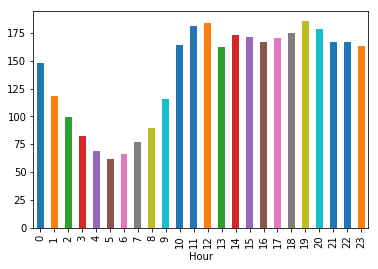

In [21]:
#Visualizing traffic count by hour
train.groupby('Hour')['Count'].mean().plot.bar()

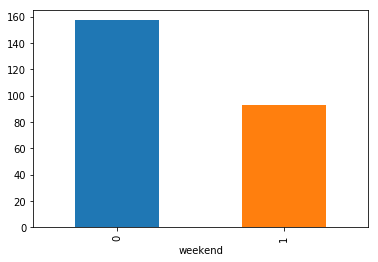

In [29]:
#Visualizing trafic on weekday
#Where 0 is weekday and 1 is the weekend
train.groupby('weekend')['Count'].mean().plot.bar()

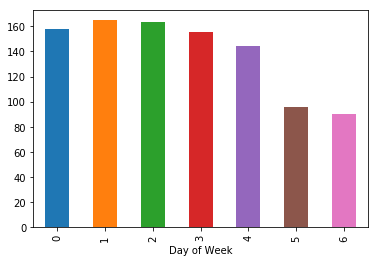

In [28]:
#Visualizing traffic by day of week
train.groupby('Day of Week')['Count'].mean().plot.bar()

In [33]:
#We can infer that traffic is higher on the weekdays, from the hours of 7am to 11pmm
#and in the summer months. Aslo we can infer that ridership has increased since the 
#train opened and that we can expect it to increase. To add to our dataset, we could also
#add general population statistics (such as income, family size), any proposed or in-the-works
#building projects that would add to ridership, and any large companies that would add growth'
#any large companies that would add growth

In [40]:
#Starting to work with the data to develope a model
#Aggregating the hourly times series to daily, weekly, and monthly time series
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H$M')
train.index = train.Timestamp

hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

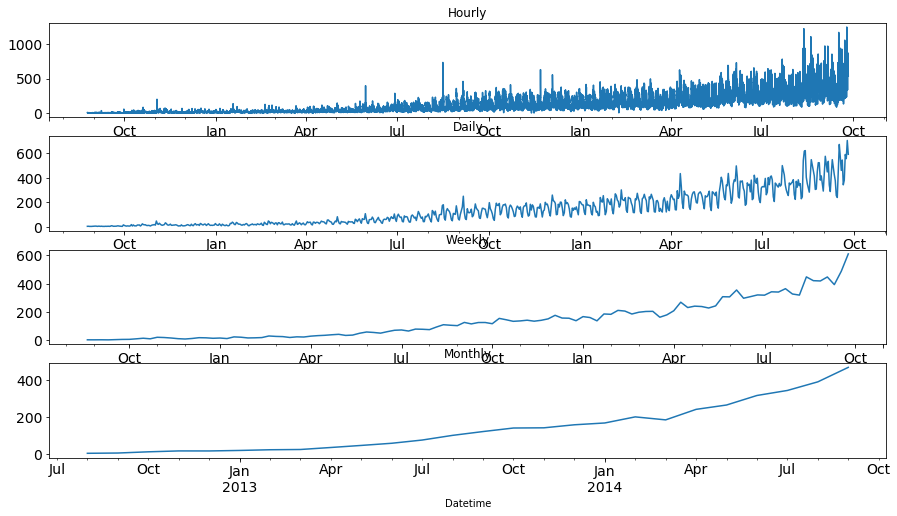

In [46]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

In [47]:
#Working with the daily timeframes
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

train = train.resample('D').mean()

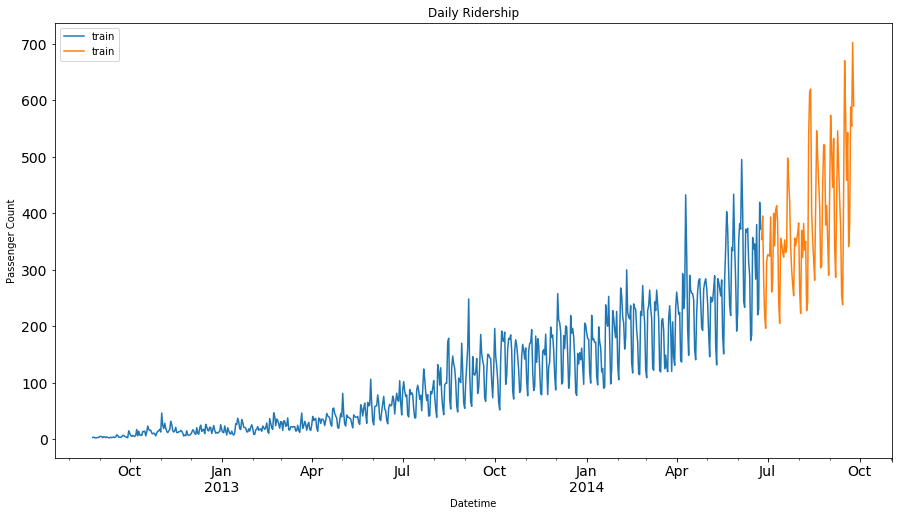

In [51]:
#Splittin the data into training and validation parts by date
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']
#Visualizing how the data has been divided
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
plt.xlabel("Datetime")
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show()